In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC

In [2]:
from sklearn.datasets import make_classification

In [4]:
x,y = make_classification(n_samples = 1000,n_features = 2,n_classes = 2,n_clusters_per_class = 2,n_redundant = 0)

In [5]:
x

array([[-2.97665969, -1.30486628],
       [ 0.84037969, -0.48632273],
       [-0.454506  , -0.71586825],
       ...,
       [ 0.92066133, -1.26375685],
       [-2.6367671 ,  0.23550925],
       [-0.93994493,  1.36202489]])

In [6]:
y

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,

In [7]:
pd.DataFrame(x)[0]

0     -2.976660
1      0.840380
2     -0.454506
3     -1.235704
4      0.166427
         ...   
995    0.992676
996   -2.499975
997    0.920661
998   -2.636767
999   -0.939945
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

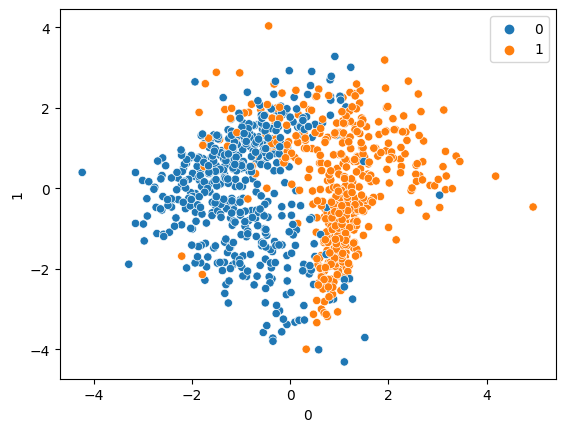

In [8]:
sns.scatterplot(x= pd.DataFrame(x)[0],y =pd.DataFrame(x)[1],hue = y)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [10]:
svc = SVC(kernel = 'linear')

In [11]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [12]:
svc.coef_

array([[1.52098266, 0.04335182]])

In [13]:
y_pred = svc.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
accuracy_score(y_test,y_pred)

0.908

In [18]:
confusion_matrix(y_test,y_pred)

array([[106,  18],
       [  5, 121]])

# Hyperparameter tunning

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel' :['linear', 'poly', 'rbf','sigmoid']
              }

In [31]:
grid = GridSearchCV(SVC(),param_grid = parameters,refit = True,verbose = 3,cv = 5)   #verbose will give the score with every combination


In [32]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.873 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.840 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.873 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.873 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.873 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.887 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.867 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.893 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [34]:
y_pred_new = grid.predict(x_test)
print(accuracy_score(y_test,y_pred_new))

0.92
